In [20]:
import pandas as pd
import numpy as np
import scanpy as sc
import os
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
from scipy.stats import zscore, wilcoxon
from tqdm import tqdm
import math

os.chdir('/home/ak431480')

# Date: 14.1.2026
# Analyzing ARNEO cell2location celltype mapping results

In [12]:
sample_sheet = pd.read_excel('/home/ak431480/sample_sheet_neadt.xlsx')
samples = sample_sheet['SAMPLE_PAD'].tolist()

## Load spatial data with cell2location mapping results
def load_slide(sample, path='/scratch/svc_td_compbio/users/kiviaho/neoadjuvant_ffpe_visium/normalized_h5ads/'):
    slide = sc.read_h5ad(f'{path}{sample}_normalized.h5ad')
    return slide

In [13]:
# Load gene signatures
signature_sheet = pd.read_excel('/home/ak431480/prostate_lineage_signatures.xlsx',skiprows=1)
signature_sheet = signature_sheet.drop(columns=['Housekeeping'])
gene_signatures_dict = signature_sheet.to_dict('list')
for k in gene_signatures_dict:
    gene_signatures_dict[k] = [
    g for g in gene_signatures_dict[k]
    if g is not None and not (isinstance(g, float) and np.isnan(g))]

geneset_names = list(gene_signatures_dict.keys())

In [14]:
adata_dict = {}
for s in tqdm(samples):
    slide = load_slide(s)
    print(s)
    for sig in gene_signatures_dict:
        print(sig)
        sc.tl.score_genes(slide,gene_signatures_dict[sig],score_name=sig,random_state=98464585,use_raw=False)
        adata_dict[s] = slide.copy()

  0%|          | 0/22 [00:00<?, ?it/s]

S19_A1-05-08617_P
TISS
Epithelial
Basal
Duct luminal
Luminal
B1_Basal-ESR1
B2_Basal
B3_Basal-GPRC5A
B4_Basal
B5_Basal-VCAN
B6_Basal-IC1
d1_dLum-Club
d2_dLum-KRT4
d3_dLum-LTF
d4_dLum-NKX3-1
d5_dLum
d6_dLum-CNMD
Lum−LTF
Lum−SFTPA2
Lum−TGM4
Lum−type1
Lum−type2
Prostate_progenitor
BPECT Luminal Identity
BPECT Basal Identity
BPECT Club Identity
BPECT Hillock Identity
CRPC-AR
CRPC-WNT
CRPC-NE
CRPC-SCL
JAK_STAT_FGFR
IL1B MDSCs
PMN-MDSCs
HALLMARK_ANDROGEN_RESPONSE
HALLMARK_IL6_JAK_STAT3_SIGNALING
HALLMARK_PI3K_AKT_MTOR_SIGNALING
HALLMARK_TNFA_SIGNALING_VIA_NFKB
HALLMARK_INTERFERON_ALPHA_RESPONSE
HALLMARK_INTERFERON_GAMMA_RESPONSE
       'ICAM1', 'IFIT3', 'MARCHF1', 'PNPT1', 'RIGI', 'ST8SIA4', 'STAT2',
       'WARS1'],
      dtype='object')
PTEN_LOSS_UP
PTEN_LOSS_DOWN
REACTOME_SIGNALING_BY_RETINOIC_ACID
SOX4_REGULON
SOX4_REGULON_LONG


  5%|▍         | 1/22 [00:11<03:53, 11.12s/it]

S20_D1-04-33992_II_B
TISS
Epithelial
Basal
Duct luminal
Luminal
B1_Basal-ESR1
B2_Basal
B3_Basal-GPRC5A
B4_Basal
B5_Basal-VCAN
B6_Basal-IC1
d1_dLum-Club
d2_dLum-KRT4
d3_dLum-LTF
d4_dLum-NKX3-1
d5_dLum
d6_dLum-CNMD
Lum−LTF
Lum−SFTPA2
Lum−TGM4
Lum−type1
Lum−type2
Prostate_progenitor
BPECT Luminal Identity
BPECT Basal Identity
BPECT Club Identity
BPECT Hillock Identity
CRPC-AR
CRPC-WNT
CRPC-NE
CRPC-SCL
JAK_STAT_FGFR
IL1B MDSCs
PMN-MDSCs
HALLMARK_ANDROGEN_RESPONSE
HALLMARK_IL6_JAK_STAT3_SIGNALING
HALLMARK_PI3K_AKT_MTOR_SIGNALING
HALLMARK_TNFA_SIGNALING_VIA_NFKB
       'STAT5A'],
      dtype='object')
HALLMARK_INTERFERON_ALPHA_RESPONSE
HALLMARK_INTERFERON_GAMMA_RESPONSE
       'ICAM1', 'IFI44', 'IFIT3', 'IL15RA', 'MARCHF1', 'PNPT1', 'RIGI',
       'ST8SIA4', 'STAT2', 'WARS1'],
      dtype='object')
PTEN_LOSS_UP
PTEN_LOSS_DOWN
REACTOME_SIGNALING_BY_RETINOIC_ACID
SOX4_REGULON
SOX4_REGULON_LONG


  9%|▉         | 2/22 [00:15<02:26,  7.32s/it]

S1_A1-05-15590_9_P
TISS
Epithelial
Basal
Duct luminal
Luminal
B1_Basal-ESR1
B2_Basal
B3_Basal-GPRC5A
B4_Basal
B5_Basal-VCAN
B6_Basal-IC1
d1_dLum-Club
d2_dLum-KRT4
d3_dLum-LTF
d4_dLum-NKX3-1
d5_dLum
d6_dLum-CNMD
Lum−LTF
Lum−SFTPA2
Lum−TGM4
Lum−type1
Lum−type2
Prostate_progenitor
BPECT Luminal Identity
BPECT Basal Identity
BPECT Club Identity
       'SRD5A3'],
      dtype='object')
BPECT Hillock Identity
CRPC-AR
       'DNAJC19'],
      dtype='object')
CRPC-WNT
CRPC-NE
CRPC-SCL
JAK_STAT_FGFR
IL1B MDSCs
       'IFNA17', 'CCL3L3', 'IL1R2', 'IL9', 'CCL4L2', 'IL10', 'IL12A', 'IL23A',
       'IL19'],
      dtype='object')
PMN-MDSCs
HALLMARK_ANDROGEN_RESPONSE
HALLMARK_IL6_JAK_STAT3_SIGNALING
HALLMARK_PI3K_AKT_MTOR_SIGNALING
HALLMARK_TNFA_SIGNALING_VIA_NFKB
       'RIGI', 'SIK1', 'STAT5A'],
      dtype='object')
HALLMARK_INTERFERON_ALPHA_RESPONSE
       'STAT2', 'TMEM140', 'WARS1'],
      dtype='object')
HALLMARK_INTERFERON_GAMMA_RESPONSE
       'ICAM1', 'IFI44', 'IFI44L', 'IFIT3', 'IL15', 'IL1

 14%|█▎        | 3/22 [00:18<01:39,  5.23s/it]

S2_D1-05-01441_II_B
TISS
Epithelial
Basal
Duct luminal
Luminal
B1_Basal-ESR1
B2_Basal
B3_Basal-GPRC5A
B4_Basal
B5_Basal-VCAN
B6_Basal-IC1
d1_dLum-Club
d2_dLum-KRT4
d3_dLum-LTF
d4_dLum-NKX3-1
d5_dLum
d6_dLum-CNMD
Lum−LTF
Lum−SFTPA2
Lum−TGM4
Lum−type1
Lum−type2
Prostate_progenitor
BPECT Luminal Identity
BPECT Basal Identity
BPECT Club Identity
BPECT Hillock Identity
CRPC-AR
CRPC-WNT
CRPC-NE
CRPC-SCL
JAK_STAT_FGFR
       'FKBP1A'],
      dtype='object')
IL1B MDSCs
       'IFNA17', 'CCL3L3', 'IL1B', 'IL22RA2', 'CCL4L2', 'IL10', 'IL12A',
       'IL23A', 'IL19'],
      dtype='object')
PMN-MDSCs
HALLMARK_ANDROGEN_RESPONSE
HALLMARK_IL6_JAK_STAT3_SIGNALING
       'REG1A', 'STAT2'],
      dtype='object')
HALLMARK_PI3K_AKT_MTOR_SIGNALING
HALLMARK_TNFA_SIGNALING_VIA_NFKB
       'IL6ST', 'KYNU', 'RIGI', 'SIK1', 'SLC2A3', 'STAT5A'],
      dtype='object')
HALLMARK_INTERFERON_ALPHA_RESPONSE
       'WARS1'],
      dtype='object')
HALLMARK_INTERFERON_GAMMA_RESPONSE
       'ICAM1', 'IFI44', 'IFIT3', 'IL1

 18%|█▊        | 4/22 [00:22<01:22,  4.56s/it]

S3_A1-05-16905_II_P
TISS
Epithelial
Basal
Duct luminal
Luminal
B1_Basal-ESR1
B2_Basal
B3_Basal-GPRC5A
B4_Basal
B5_Basal-VCAN
B6_Basal-IC1
d1_dLum-Club
d2_dLum-KRT4
d3_dLum-LTF
d4_dLum-NKX3-1
d5_dLum
d6_dLum-CNMD
Lum−LTF
Lum−SFTPA2
Lum−TGM4
Lum−type1
Lum−type2
Prostate_progenitor
BPECT Luminal Identity
BPECT Basal Identity
BPECT Club Identity
BPECT Hillock Identity
CRPC-AR
CRPC-WNT
CRPC-NE
CRPC-SCL
JAK_STAT_FGFR
IL1B MDSCs
PMN-MDSCs
HALLMARK_ANDROGEN_RESPONSE
HALLMARK_IL6_JAK_STAT3_SIGNALING
HALLMARK_PI3K_AKT_MTOR_SIGNALING
HALLMARK_TNFA_SIGNALING_VIA_NFKB
HALLMARK_INTERFERON_ALPHA_RESPONSE
HALLMARK_INTERFERON_GAMMA_RESPONSE
       'ICAM1', 'IFIT3', 'MARCHF1', 'PNPT1', 'RIGI', 'ST8SIA4', 'STAT2',
       'WARS1'],
      dtype='object')
PTEN_LOSS_UP
PTEN_LOSS_DOWN
REACTOME_SIGNALING_BY_RETINOIC_ACID
SOX4_REGULON
SOX4_REGULON_LONG


 23%|██▎       | 5/22 [00:31<01:48,  6.38s/it]

S4_D1-04-37131_I_B
TISS
Epithelial
Basal
Duct luminal
Luminal
B1_Basal-ESR1
B2_Basal
B3_Basal-GPRC5A
B4_Basal
B5_Basal-VCAN
B6_Basal-IC1
d1_dLum-Club
d2_dLum-KRT4
d3_dLum-LTF
d4_dLum-NKX3-1
d5_dLum
d6_dLum-CNMD
Lum−LTF
Lum−SFTPA2
Lum−TGM4
Lum−type1
Lum−type2
Prostate_progenitor
BPECT Luminal Identity
BPECT Basal Identity
BPECT Club Identity
       'SRD5A3'],
      dtype='object')
BPECT Hillock Identity
CRPC-AR
CRPC-WNT
       'ECEL1', 'PRSS56', 'IL23A', 'FGF20', 'OTOP1', 'TAC3'],
      dtype='object')
CRPC-NE
       'RAP1B', 'ACTL8', 'INSM1', 'CELSR3', 'HMGB3'],
      dtype='object')
CRPC-SCL
JAK_STAT_FGFR
       'FGF23', 'FGF4', 'FGF5', 'FGF6', 'TGIF', 'FKBP1A'],
      dtype='object')
IL1B MDSCs
       'IL17F', 'IL12RB2', 'CCL24', 'TNFRSF4', 'CXCR1', 'IL1RL1', 'IL7',
       'IL1RN', 'IFNB1', 'IFNA6', 'IFNA21', 'IFNA10', 'IFNA7', 'IFNA14',
       'IFNA13', 'IFNA17', 'IFNA4', 'IL12B', 'CCL18', 'CCL3L3', 'CCL3', 'IL1B',
       'IL9', 'IL22RA2', 'CCL4L2', 'TNFSF8', 'IL10', 'IL12A', 'CXCR2

 27%|██▋       | 6/22 [00:34<01:20,  5.03s/it]

S18_D1-05-17668_II_P
TISS
Epithelial
Basal
Duct luminal
Luminal
B1_Basal-ESR1
B2_Basal
B3_Basal-GPRC5A
B4_Basal
B5_Basal-VCAN
B6_Basal-IC1
d1_dLum-Club
d2_dLum-KRT4
d3_dLum-LTF
d4_dLum-NKX3-1
d5_dLum
d6_dLum-CNMD
Lum−LTF
Lum−SFTPA2
Lum−TGM4
Lum−type1
Lum−type2
Prostate_progenitor
BPECT Luminal Identity
BPECT Basal Identity
BPECT Club Identity
BPECT Hillock Identity
CRPC-AR
CRPC-WNT
CRPC-NE
CRPC-SCL
JAK_STAT_FGFR
IL1B MDSCs
PMN-MDSCs
HALLMARK_ANDROGEN_RESPONSE
HALLMARK_IL6_JAK_STAT3_SIGNALING
HALLMARK_PI3K_AKT_MTOR_SIGNALING
HALLMARK_TNFA_SIGNALING_VIA_NFKB
       'STAT5A'],
      dtype='object')
HALLMARK_INTERFERON_ALPHA_RESPONSE
HALLMARK_INTERFERON_GAMMA_RESPONSE
       'ICAM1', 'IFI44', 'IFIT3', 'IL15RA', 'MARCHF1', 'PNPT1', 'RIGI',
       'ST8SIA4', 'STAT2', 'WARS1'],
      dtype='object')
PTEN_LOSS_UP
PTEN_LOSS_DOWN
REACTOME_SIGNALING_BY_RETINOIC_ACID
SOX4_REGULON
SOX4_REGULON_LONG


 32%|███▏      | 7/22 [00:41<01:29,  5.94s/it]

S15_A1-05-25866_P
TISS
Epithelial
Basal
Duct luminal
Luminal
B1_Basal-ESR1
B2_Basal
B3_Basal-GPRC5A
B4_Basal
B5_Basal-VCAN
B6_Basal-IC1
d1_dLum-Club
d2_dLum-KRT4
d3_dLum-LTF
d4_dLum-NKX3-1
d5_dLum
d6_dLum-CNMD
Lum−LTF
Lum−SFTPA2
Lum−TGM4
Lum−type1
Lum−type2
Prostate_progenitor
BPECT Luminal Identity
BPECT Basal Identity
BPECT Club Identity
BPECT Hillock Identity
CRPC-AR
CRPC-WNT
CRPC-NE
CRPC-SCL
JAK_STAT_FGFR
IL1B MDSCs
PMN-MDSCs
HALLMARK_ANDROGEN_RESPONSE
HALLMARK_IL6_JAK_STAT3_SIGNALING
HALLMARK_PI3K_AKT_MTOR_SIGNALING
HALLMARK_TNFA_SIGNALING_VIA_NFKB
HALLMARK_INTERFERON_ALPHA_RESPONSE
HALLMARK_INTERFERON_GAMMA_RESPONSE
       'MARCHF1', 'PNPT1', 'RIGI', 'WARS1'],
      dtype='object')
PTEN_LOSS_UP
PTEN_LOSS_DOWN
REACTOME_SIGNALING_BY_RETINOIC_ACID
SOX4_REGULON
SOX4_REGULON_LONG


 36%|███▋      | 8/22 [00:51<01:40,  7.20s/it]

S16_D1-05-3149_I_B
TISS
Epithelial
Basal
Duct luminal
Luminal
B1_Basal-ESR1
B2_Basal
B3_Basal-GPRC5A
B4_Basal
B5_Basal-VCAN
B6_Basal-IC1
d1_dLum-Club
d2_dLum-KRT4
d3_dLum-LTF
d4_dLum-NKX3-1
d5_dLum
d6_dLum-CNMD
Lum−LTF
Lum−SFTPA2
Lum−TGM4
Lum−type1
Lum−type2
Prostate_progenitor
BPECT Luminal Identity
BPECT Basal Identity
BPECT Club Identity
BPECT Hillock Identity
CRPC-AR
CRPC-WNT
CRPC-NE
CRPC-SCL
JAK_STAT_FGFR
IL1B MDSCs
PMN-MDSCs
HALLMARK_ANDROGEN_RESPONSE
HALLMARK_IL6_JAK_STAT3_SIGNALING
HALLMARK_PI3K_AKT_MTOR_SIGNALING
HALLMARK_TNFA_SIGNALING_VIA_NFKB
HALLMARK_INTERFERON_ALPHA_RESPONSE
HALLMARK_INTERFERON_GAMMA_RESPONSE
       'MARCHF1', 'PNPT1', 'RIGI', 'WARS1'],
      dtype='object')
PTEN_LOSS_UP
PTEN_LOSS_DOWN
REACTOME_SIGNALING_BY_RETINOIC_ACID
SOX4_REGULON
SOX4_REGULON_LONG


 41%|████      | 9/22 [00:55<01:20,  6.16s/it]

S22_D1-05-24402_P
TISS
Epithelial
Basal
Duct luminal
Luminal
B1_Basal-ESR1
B2_Basal
B3_Basal-GPRC5A
B4_Basal
B5_Basal-VCAN
B6_Basal-IC1
d1_dLum-Club
d2_dLum-KRT4
d3_dLum-LTF
d4_dLum-NKX3-1
d5_dLum
d6_dLum-CNMD
Lum−LTF
Lum−SFTPA2
Lum−TGM4
Lum−type1
Lum−type2
Prostate_progenitor
BPECT Luminal Identity
BPECT Basal Identity
BPECT Club Identity
BPECT Hillock Identity
CRPC-AR
CRPC-WNT
CRPC-NE
CRPC-SCL
JAK_STAT_FGFR
IL1B MDSCs
PMN-MDSCs
HALLMARK_ANDROGEN_RESPONSE
HALLMARK_IL6_JAK_STAT3_SIGNALING
HALLMARK_PI3K_AKT_MTOR_SIGNALING
HALLMARK_TNFA_SIGNALING_VIA_NFKB
HALLMARK_INTERFERON_ALPHA_RESPONSE
HALLMARK_INTERFERON_GAMMA_RESPONSE
       'MARCHF1', 'PNPT1', 'RIGI', 'WARS1'],
      dtype='object')
PTEN_LOSS_UP
PTEN_LOSS_DOWN
REACTOME_SIGNALING_BY_RETINOIC_ACID
SOX4_REGULON
SOX4_REGULON_LONG


 45%|████▌     | 10/22 [01:05<01:29,  7.42s/it]

S21_A1-05-10603_I_B
TISS
Epithelial
Basal
Duct luminal
Luminal
B1_Basal-ESR1
B2_Basal
B3_Basal-GPRC5A
B4_Basal
B5_Basal-VCAN
B6_Basal-IC1
d1_dLum-Club
d2_dLum-KRT4
d3_dLum-LTF
d4_dLum-NKX3-1
d5_dLum
d6_dLum-CNMD
Lum−LTF
Lum−SFTPA2
Lum−TGM4
Lum−type1
Lum−type2
Prostate_progenitor
BPECT Luminal Identity
BPECT Basal Identity
BPECT Club Identity
BPECT Hillock Identity
CRPC-AR
CRPC-WNT
CRPC-NE
CRPC-SCL
JAK_STAT_FGFR
IL1B MDSCs
PMN-MDSCs
HALLMARK_ANDROGEN_RESPONSE
HALLMARK_IL6_JAK_STAT3_SIGNALING
HALLMARK_PI3K_AKT_MTOR_SIGNALING
HALLMARK_TNFA_SIGNALING_VIA_NFKB
HALLMARK_INTERFERON_ALPHA_RESPONSE
HALLMARK_INTERFERON_GAMMA_RESPONSE
       'MARCHF1', 'PNPT1', 'RIGI', 'WARS1'],
      dtype='object')
PTEN_LOSS_UP
PTEN_LOSS_DOWN
REACTOME_SIGNALING_BY_RETINOIC_ACID
SOX4_REGULON
SOX4_REGULON_LONG


 50%|█████     | 11/22 [01:10<01:13,  6.69s/it]

S17_A1-05-27153_I_P
TISS
Epithelial
Basal
Duct luminal
Luminal
B1_Basal-ESR1
B2_Basal
B3_Basal-GPRC5A
B4_Basal
B5_Basal-VCAN
B6_Basal-IC1
d1_dLum-Club
d2_dLum-KRT4
d3_dLum-LTF
d4_dLum-NKX3-1
d5_dLum
d6_dLum-CNMD
Lum−LTF
Lum−SFTPA2
Lum−TGM4
Lum−type1
Lum−type2
Prostate_progenitor
BPECT Luminal Identity
BPECT Basal Identity
BPECT Club Identity
BPECT Hillock Identity
CRPC-AR
CRPC-WNT
CRPC-NE
CRPC-SCL
JAK_STAT_FGFR
IL1B MDSCs
PMN-MDSCs
HALLMARK_ANDROGEN_RESPONSE
HALLMARK_IL6_JAK_STAT3_SIGNALING
HALLMARK_PI3K_AKT_MTOR_SIGNALING
HALLMARK_TNFA_SIGNALING_VIA_NFKB
HALLMARK_INTERFERON_ALPHA_RESPONSE
HALLMARK_INTERFERON_GAMMA_RESPONSE
       'ICAM1', 'IFI44', 'IFIT3', 'MARCHF1', 'PNPT1', 'RIGI', 'ST8SIA4',
       'WARS1'],
      dtype='object')
PTEN_LOSS_UP
PTEN_LOSS_DOWN
REACTOME_SIGNALING_BY_RETINOIC_ACID
SOX4_REGULON
SOX4_REGULON_LONG


 55%|█████▍    | 12/22 [01:22<01:20,  8.09s/it]

S6_D1-05-29927_III7_P
TISS
Epithelial
Basal
Duct luminal
Luminal
B1_Basal-ESR1
B2_Basal
B3_Basal-GPRC5A
B4_Basal
B5_Basal-VCAN
B6_Basal-IC1
d1_dLum-Club
d2_dLum-KRT4
d3_dLum-LTF
d4_dLum-NKX3-1
d5_dLum
d6_dLum-CNMD
Lum−LTF
Lum−SFTPA2
Lum−TGM4
Lum−type1
Lum−type2
Prostate_progenitor
BPECT Luminal Identity
BPECT Basal Identity
BPECT Club Identity
BPECT Hillock Identity
CRPC-AR
CRPC-WNT
CRPC-NE
CRPC-SCL
JAK_STAT_FGFR
IL1B MDSCs
PMN-MDSCs
HALLMARK_ANDROGEN_RESPONSE
HALLMARK_IL6_JAK_STAT3_SIGNALING
HALLMARK_PI3K_AKT_MTOR_SIGNALING
HALLMARK_TNFA_SIGNALING_VIA_NFKB
HALLMARK_INTERFERON_ALPHA_RESPONSE
       'WARS1'],
      dtype='object')
HALLMARK_INTERFERON_GAMMA_RESPONSE
       'ICAM1', 'IFI44', 'IFIT3', 'MARCHF1', 'PNPT1', 'RIGI', 'SAMD9L',
       'ST8SIA4', 'STAT2', 'WARS1'],
      dtype='object')
PTEN_LOSS_UP
PTEN_LOSS_DOWN
REACTOME_SIGNALING_BY_RETINOIC_ACID
SOX4_REGULON
SOX4_REGULON_LONG


 59%|█████▉    | 13/22 [01:29<01:11,  7.94s/it]

S5_A1-05-17318_II_B
TISS
Epithelial
Basal
Duct luminal
Luminal
B1_Basal-ESR1
B2_Basal
B3_Basal-GPRC5A
B4_Basal
B5_Basal-VCAN
B6_Basal-IC1
d1_dLum-Club
d2_dLum-KRT4
d3_dLum-LTF
d4_dLum-NKX3-1
d5_dLum
d6_dLum-CNMD
Lum−LTF
Lum−SFTPA2
Lum−TGM4
Lum−type1
Lum−type2
Prostate_progenitor
BPECT Luminal Identity
BPECT Basal Identity
BPECT Club Identity
BPECT Hillock Identity
CRPC-AR
CRPC-WNT
       'OTOP1'],
      dtype='object')
CRPC-NE
CRPC-SCL
JAK_STAT_FGFR
       'FKBP1A'],
      dtype='object')
IL1B MDSCs
       'IFNA17', 'CCL18', 'CCL3L3', 'IL1R2', 'IL1B', 'IL9', 'CCL4L2', 'IL10',
       'IL12A', 'IL23A', 'IL19'],
      dtype='object')
PMN-MDSCs
HALLMARK_ANDROGEN_RESPONSE
HALLMARK_IL6_JAK_STAT3_SIGNALING
       'STAT2'],
      dtype='object')
HALLMARK_PI3K_AKT_MTOR_SIGNALING
HALLMARK_TNFA_SIGNALING_VIA_NFKB
       'IL6ST', 'INHBA', 'RIGI', 'SIK1', 'STAT5A'],
      dtype='object')
HALLMARK_INTERFERON_ALPHA_RESPONSE
       'SAMD9L', 'STAT2', 'WARS1'],
      dtype='object')
HALLMARK_INTERFERON

 64%|██████▎   | 14/22 [01:33<00:54,  6.80s/it]

S7_A1-06-2116_P
TISS
Epithelial
Basal
Duct luminal
Luminal
B1_Basal-ESR1
B2_Basal
B3_Basal-GPRC5A
B4_Basal
B5_Basal-VCAN
B6_Basal-IC1
d1_dLum-Club
d2_dLum-KRT4
d3_dLum-LTF
d4_dLum-NKX3-1
d5_dLum
d6_dLum-CNMD
Lum−LTF
Lum−SFTPA2
Lum−TGM4
Lum−type1
Lum−type2
Prostate_progenitor
BPECT Luminal Identity
BPECT Basal Identity
BPECT Club Identity
BPECT Hillock Identity
CRPC-AR
CRPC-WNT
CRPC-NE
CRPC-SCL
JAK_STAT_FGFR
IL1B MDSCs
PMN-MDSCs
HALLMARK_ANDROGEN_RESPONSE
HALLMARK_IL6_JAK_STAT3_SIGNALING
HALLMARK_PI3K_AKT_MTOR_SIGNALING
HALLMARK_TNFA_SIGNALING_VIA_NFKB
HALLMARK_INTERFERON_ALPHA_RESPONSE
HALLMARK_INTERFERON_GAMMA_RESPONSE
       'ICAM1', 'IFIT3', 'MARCHF1', 'PNPT1', 'RIGI', 'SAMD9L', 'ST8SIA4',
       'STAT2', 'WARS1'],
      dtype='object')
PTEN_LOSS_UP
PTEN_LOSS_DOWN
REACTOME_SIGNALING_BY_RETINOIC_ACID
SOX4_REGULON
SOX4_REGULON_LONG


 68%|██████▊   | 15/22 [01:40<00:46,  6.65s/it]

S8_D1-05-30372_II_B
TISS
Epithelial
Basal
Duct luminal
Luminal
B1_Basal-ESR1
B2_Basal
B3_Basal-GPRC5A
B4_Basal
B5_Basal-VCAN
B6_Basal-IC1
d1_dLum-Club
d2_dLum-KRT4
d3_dLum-LTF
d4_dLum-NKX3-1
d5_dLum
d6_dLum-CNMD
Lum−LTF
Lum−SFTPA2
Lum−TGM4
Lum−type1
Lum−type2
Prostate_progenitor
BPECT Luminal Identity
BPECT Basal Identity
BPECT Club Identity
       'SRD5A3'],
      dtype='object')
BPECT Hillock Identity
CRPC-AR
CRPC-WNT
CRPC-NE
CRPC-SCL
JAK_STAT_FGFR
IL1B MDSCs
       'IL1B', 'IL9', 'IL10', 'IL23A', 'IL19'],
      dtype='object')
PMN-MDSCs
HALLMARK_ANDROGEN_RESPONSE
HALLMARK_IL6_JAK_STAT3_SIGNALING
HALLMARK_PI3K_AKT_MTOR_SIGNALING
HALLMARK_TNFA_SIGNALING_VIA_NFKB
       'RIGI', 'SIK1', 'STAT5A'],
      dtype='object')
HALLMARK_INTERFERON_ALPHA_RESPONSE
       'WARS1'],
      dtype='object')
HALLMARK_INTERFERON_GAMMA_RESPONSE
       'ICAM1', 'IFI44', 'IFIT3', 'IL15RA', 'MARCHF1', 'PNPT1', 'RIGI',
       'SAMD9L', 'ST8SIA4', 'STAT2', 'WARS1'],
      dtype='object')
PTEN_LOSS_UP
PTEN_LOSS

 73%|███████▎  | 16/22 [01:44<00:35,  5.89s/it]

S10_D1-06-3093_P
TISS
Epithelial
Basal
Duct luminal
Luminal
B1_Basal-ESR1
B2_Basal
B3_Basal-GPRC5A
B4_Basal
B5_Basal-VCAN
B6_Basal-IC1
d1_dLum-Club
d2_dLum-KRT4
d3_dLum-LTF
d4_dLum-NKX3-1
d5_dLum
d6_dLum-CNMD
Lum−LTF
Lum−SFTPA2
Lum−TGM4
Lum−type1
Lum−type2
Prostate_progenitor
BPECT Luminal Identity
BPECT Basal Identity
BPECT Club Identity
BPECT Hillock Identity
CRPC-AR
CRPC-WNT
CRPC-NE
CRPC-SCL
JAK_STAT_FGFR
IL1B MDSCs
PMN-MDSCs
HALLMARK_ANDROGEN_RESPONSE
HALLMARK_IL6_JAK_STAT3_SIGNALING
HALLMARK_PI3K_AKT_MTOR_SIGNALING
HALLMARK_TNFA_SIGNALING_VIA_NFKB
HALLMARK_INTERFERON_ALPHA_RESPONSE
HALLMARK_INTERFERON_GAMMA_RESPONSE
       'ICAM1', 'IFI44', 'IFIT3', 'MARCHF1', 'PNPT1', 'RIGI', 'ST8SIA4',
       'WARS1'],
      dtype='object')
PTEN_LOSS_UP
PTEN_LOSS_DOWN
REACTOME_SIGNALING_BY_RETINOIC_ACID
SOX4_REGULON
SOX4_REGULON_LONG


 77%|███████▋  | 17/22 [01:55<00:37,  7.44s/it]

S9_A1-05-32045_I_B
TISS
Epithelial
Basal
Duct luminal
Luminal
B1_Basal-ESR1
B2_Basal
B3_Basal-GPRC5A
B4_Basal
B5_Basal-VCAN
B6_Basal-IC1
d1_dLum-Club
d2_dLum-KRT4
d3_dLum-LTF
d4_dLum-NKX3-1
d5_dLum
d6_dLum-CNMD
Lum−LTF
Lum−SFTPA2
Lum−TGM4
Lum−type1
Lum−type2
Prostate_progenitor
BPECT Luminal Identity
BPECT Basal Identity
BPECT Club Identity
BPECT Hillock Identity
CRPC-AR
CRPC-WNT
CRPC-NE
CRPC-SCL
JAK_STAT_FGFR
IL1B MDSCs
PMN-MDSCs
HALLMARK_ANDROGEN_RESPONSE
HALLMARK_IL6_JAK_STAT3_SIGNALING
HALLMARK_PI3K_AKT_MTOR_SIGNALING
HALLMARK_TNFA_SIGNALING_VIA_NFKB
       'STAT5A'],
      dtype='object')
HALLMARK_INTERFERON_ALPHA_RESPONSE
HALLMARK_INTERFERON_GAMMA_RESPONSE
       'ICAM1', 'IFI44', 'IFIT3', 'MARCHF1', 'PNPT1', 'RIGI', 'SAMD9L',
       'ST8SIA4', 'WARS1'],
      dtype='object')
PTEN_LOSS_UP
PTEN_LOSS_DOWN
REACTOME_SIGNALING_BY_RETINOIC_ACID
SOX4_REGULON
SOX4_REGULON_LONG


 82%|████████▏ | 18/22 [02:01<00:28,  7.13s/it]

S12_D1-05-35592_I_B
TISS
Epithelial
Basal
Duct luminal
Luminal
B1_Basal-ESR1
B2_Basal
B3_Basal-GPRC5A
B4_Basal
B5_Basal-VCAN
B6_Basal-IC1
d1_dLum-Club
d2_dLum-KRT4
d3_dLum-LTF
d4_dLum-NKX3-1
d5_dLum
d6_dLum-CNMD
Lum−LTF
Lum−SFTPA2
Lum−TGM4
Lum−type1
Lum−type2
Prostate_progenitor
BPECT Luminal Identity
BPECT Basal Identity
BPECT Club Identity
BPECT Hillock Identity
CRPC-AR
       'DNAJC19'],
      dtype='object')
CRPC-WNT
CRPC-NE
CRPC-SCL
JAK_STAT_FGFR
IL1B MDSCs
       'IL23A', 'IL19'],
      dtype='object')
PMN-MDSCs
HALLMARK_ANDROGEN_RESPONSE
HALLMARK_IL6_JAK_STAT3_SIGNALING
HALLMARK_PI3K_AKT_MTOR_SIGNALING
HALLMARK_TNFA_SIGNALING_VIA_NFKB
       'STAT5A'],
      dtype='object')
HALLMARK_INTERFERON_ALPHA_RESPONSE
       'STAT2', 'WARS1'],
      dtype='object')
HALLMARK_INTERFERON_GAMMA_RESPONSE
       'ICAM1', 'IFI44', 'IFI44L', 'IFIT3', 'IL15RA', 'MARCHF1', 'PNPT1',
       'RIGI', 'SAMD9L', 'ST8SIA4', 'STAT2', 'WARS1'],
      dtype='object')
PTEN_LOSS_UP
PTEN_LOSS_DOWN
REACTOME_SIGN

 86%|████████▋ | 19/22 [02:06<00:19,  6.41s/it]

S11_A1-06-7221_P
TISS
Epithelial
Basal
Duct luminal
Luminal
B1_Basal-ESR1
B2_Basal
B3_Basal-GPRC5A
B4_Basal
B5_Basal-VCAN
B6_Basal-IC1
d1_dLum-Club
d2_dLum-KRT4
d3_dLum-LTF
d4_dLum-NKX3-1
d5_dLum
d6_dLum-CNMD
Lum−LTF
Lum−SFTPA2
Lum−TGM4
Lum−type1
Lum−type2
Prostate_progenitor
BPECT Luminal Identity
BPECT Basal Identity
BPECT Club Identity
BPECT Hillock Identity
CRPC-AR
CRPC-WNT
CRPC-NE
CRPC-SCL
JAK_STAT_FGFR
IL1B MDSCs
PMN-MDSCs
HALLMARK_ANDROGEN_RESPONSE
HALLMARK_IL6_JAK_STAT3_SIGNALING
HALLMARK_PI3K_AKT_MTOR_SIGNALING
HALLMARK_TNFA_SIGNALING_VIA_NFKB
       'STAT5A'],
      dtype='object')
HALLMARK_INTERFERON_ALPHA_RESPONSE
       'WARS1'],
      dtype='object')
HALLMARK_INTERFERON_GAMMA_RESPONSE
       'ICAM1', 'IFI44', 'IFIT3', 'IL15RA', 'IRF4', 'MARCHF1', 'PNPT1', 'RIGI',
       'SAMD9L', 'ST8SIA4', 'STAT2', 'WARS1'],
      dtype='object')
PTEN_LOSS_UP
PTEN_LOSS_DOWN
REACTOME_SIGNALING_BY_RETINOIC_ACID
SOX4_REGULON
SOX4_REGULON_LONG


 91%|█████████ | 20/22 [02:12<00:12,  6.28s/it]

S13_A1-06-16086_P
TISS
Epithelial
Basal
Duct luminal
Luminal
B1_Basal-ESR1
B2_Basal
B3_Basal-GPRC5A
B4_Basal
B5_Basal-VCAN
B6_Basal-IC1
d1_dLum-Club
d2_dLum-KRT4
d3_dLum-LTF
d4_dLum-NKX3-1
d5_dLum
d6_dLum-CNMD
Lum−LTF
Lum−SFTPA2
Lum−TGM4
Lum−type1
Lum−type2
Prostate_progenitor
BPECT Luminal Identity
BPECT Basal Identity
BPECT Club Identity
BPECT Hillock Identity
CRPC-AR
CRPC-WNT
CRPC-NE
CRPC-SCL
JAK_STAT_FGFR
IL1B MDSCs
PMN-MDSCs
HALLMARK_ANDROGEN_RESPONSE
HALLMARK_IL6_JAK_STAT3_SIGNALING
HALLMARK_PI3K_AKT_MTOR_SIGNALING
HALLMARK_TNFA_SIGNALING_VIA_NFKB
HALLMARK_INTERFERON_ALPHA_RESPONSE
HALLMARK_INTERFERON_GAMMA_RESPONSE
       'MARCHF1', 'PNPT1', 'RIGI', 'WARS1'],
      dtype='object')
PTEN_LOSS_UP
PTEN_LOSS_DOWN
REACTOME_SIGNALING_BY_RETINOIC_ACID
SOX4_REGULON
SOX4_REGULON_LONG


 95%|█████████▌| 21/22 [02:23<00:07,  7.74s/it]

S14_D1-06-01637_II_B
TISS
Epithelial
Basal
Duct luminal
Luminal
B1_Basal-ESR1
B2_Basal
B3_Basal-GPRC5A
B4_Basal
B5_Basal-VCAN
B6_Basal-IC1
d1_dLum-Club
d2_dLum-KRT4
d3_dLum-LTF
d4_dLum-NKX3-1
d5_dLum
d6_dLum-CNMD
Lum−LTF
Lum−SFTPA2
Lum−TGM4
Lum−type1
Lum−type2
Prostate_progenitor
BPECT Luminal Identity
BPECT Basal Identity
BPECT Club Identity
BPECT Hillock Identity
CRPC-AR
CRPC-WNT
CRPC-NE
CRPC-SCL
JAK_STAT_FGFR
IL1B MDSCs
PMN-MDSCs
HALLMARK_ANDROGEN_RESPONSE
HALLMARK_IL6_JAK_STAT3_SIGNALING
HALLMARK_PI3K_AKT_MTOR_SIGNALING
HALLMARK_TNFA_SIGNALING_VIA_NFKB
HALLMARK_INTERFERON_ALPHA_RESPONSE
HALLMARK_INTERFERON_GAMMA_RESPONSE
       'MARCHF1', 'PNPT1', 'RIGI', 'WARS1'],
      dtype='object')
PTEN_LOSS_UP
PTEN_LOSS_DOWN
REACTOME_SIGNALING_BY_RETINOIC_ACID
SOX4_REGULON
SOX4_REGULON_LONG


100%|██████████| 22/22 [02:28<00:00,  6.75s/it]


In [15]:
df = sample_sheet.set_index('SAMPLE_PAD')
obs_data = []
for s in adata_dict:
    obsdat = adata_dict[s].obs.copy()
    obsdat_cols = obsdat.columns.tolist()
    obsdat['sample'] = df.loc[s,'SAMPLE']
    obsdat['patient'] = df.loc[s,'PATIENT']
    obsdat['treatment'] = df.loc[s,'TREATMENT']
    obsdat = obsdat[['sample','patient','treatment'] + obsdat_cols]
    if ((df.loc[s,'TREATMENT'] == 'bicalutamide') | (df.loc[s,'TREATMENT'] == 'goserelin')):
        obsdat['treatment_simple'] = 'adt'
    else:
        obsdat['treatment_simple'] = 'none'
    obs_data.append(obsdat)
obs_data = pd.concat(obs_data)
obs_data['treatment_simple'] = pd.Categorical(obs_data['treatment_simple'],categories = ['none','adt'])

obs_data[list(gene_signatures_dict.keys())] = zscore(obs_data[list(gene_signatures_dict.keys())],axis=0)

obs_data.head()

,sample,patient,treatment,in_tissue,array_row,array_col,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,...,HALLMARK_PI3K_AKT_MTOR_SIGNALING,HALLMARK_TNFA_SIGNALING_VIA_NFKB,HALLMARK_INTERFERON_ALPHA_RESPONSE,HALLMARK_INTERFERON_GAMMA_RESPONSE,PTEN_LOSS_UP,PTEN_LOSS_DOWN,REACTOME_SIGNALING_BY_RETINOIC_ACID,SOX4_REGULON,SOX4_REGULON_LONG,treatment_simple
S19_A1-05-08617_P_AACACCTACTATCGAA-1,P02_post,P02,goserelin,1.0,0.0,122.0,1539,7.339538,1997.0,7.599902,...,0.895879,0.578603,-0.092227,0.848658,1.273364,-0.374206,0.236427,0.049009,0.654263,adt
S19_A1-05-08617_P_AACACGTGCATCGCAC-1,P02_post,P02,goserelin,1.0,76.0,22.0,2831,7.948738,4618.0,8.437934,...,0.585555,-1.285420,0.028293,-0.411883,-1.344604,1.079354,1.124106,-0.706560,-1.020756,adt
S19_A1-05-08617_P_AACACTTGGCAAGGAA-1,P02_post,P02,goserelin,1.0,47.0,71.0,1702,7.440147,2476.0,7.814804,...,-0.437398,-0.091605,0.876894,1.242329,-0.742584,0.996359,0.681233,-1.079071,-1.535387,adt
S19_A1-05-08617_P_AACAGGATTCATAGTT-1,P02_post,P02,goserelin,1.0,49.0,43.0,1765,7.476472,2803.0,7.938802,...,0.381612,0.540234,0.576547,-0.150261,-1.515805,0.022407,-1.803463,2.066728,1.907953,adt
S19_A1-05-08617_P_AACAGGTTATTGCACC-1,P02_post,P02,goserelin,1.0,28.0,86.0,2276,7.730614,3215.0,8.075893,...,-0.539040,0.162943,-0.103884,0.001868,0.577789,0.713533,-0.819823,0.258999,0.301249,adt


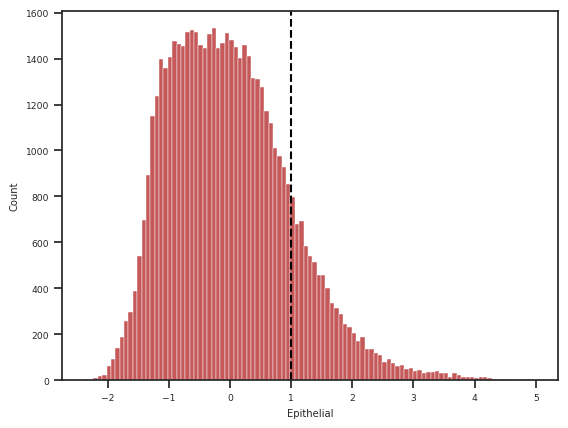

In [57]:
sns.histplot(obs_data['Epithelial'])
plt.axvline(x=1,color='k',linestyle='--')


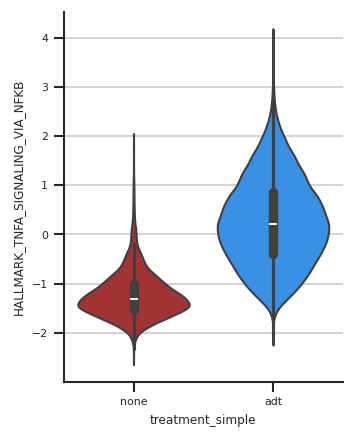

In [17]:
df = obs_data.copy()
#df = obs_data[obs_data['Epithelial'] > 1].copy()

sns.set_theme(
    style='white',
    palette=sns.color_palette(['firebrick','dodgerblue']),
    font_scale=0.6,
    rc={'xtick.bottom': True, 'ytick.left': True}
)

sig = 'HALLMARK_TNFA_SIGNALING_VIA_NFKB'
#sig = 'HALLMARK_INTERFERON_GAMMA_RESPONSE'

fig, ax = plt.subplots(figsize=(3,4),dpi=120)
sns.violinplot(df,x='treatment_simple', y=sig, hue='treatment_simple', ax=ax)
ax.spines[['top','right']].set_visible(False)
ax.grid(axis='y')
plt.show()

## Pairwise comparisons

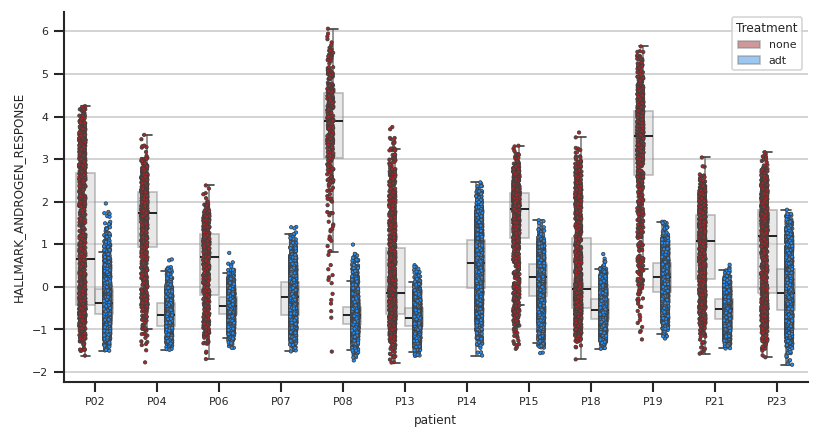

In [18]:
sig = 'HALLMARK_ANDROGEN_RESPONSE'
#sig = 'JAK_STAT_FGFR'

fig, ax = plt.subplots(figsize=(8, 4), dpi=120)

# Boxplot FIRST (background)
sns.boxplot(
    data=df,
    x='patient',
    y=sig,
    hue='treatment_simple',
    dodge=True,
    ax=ax,
    width=0.6,
    showcaps=True,
    boxprops=dict(facecolor='lightgray', edgecolor='gray', alpha=0.5),
    whiskerprops=dict(color='gray'),
    medianprops=dict(color='black'),
    flierprops=dict(marker=''),
)

# Stripplot on top
sns.stripplot(
    data=df,
    x='patient',
    y=sig,
    hue='treatment_simple',
    dodge=True,
    size=2,
    linewidth=0.5,
    ax=ax,
)

# Clean up
ax.spines[['top', 'right']].set_visible(False)
ax.grid(axis='y')

# Remove duplicate legend
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[:len(set(df['treatment_simple']))],
          labels[:len(set(df['treatment_simple']))],
          title='Treatment')

plt.show()


/tmp/ipykernel_185703/3792606115.py:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(["patient", "treatment_simple"], as_index=False)[sig]
/tmp/ipykernel_185703/3792606115.py:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(["patient", "treatment_simple"], as_index=False)[sig]
/tmp/ipykernel_185703/3792606115.py:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(["patient", "treatment_simple"]

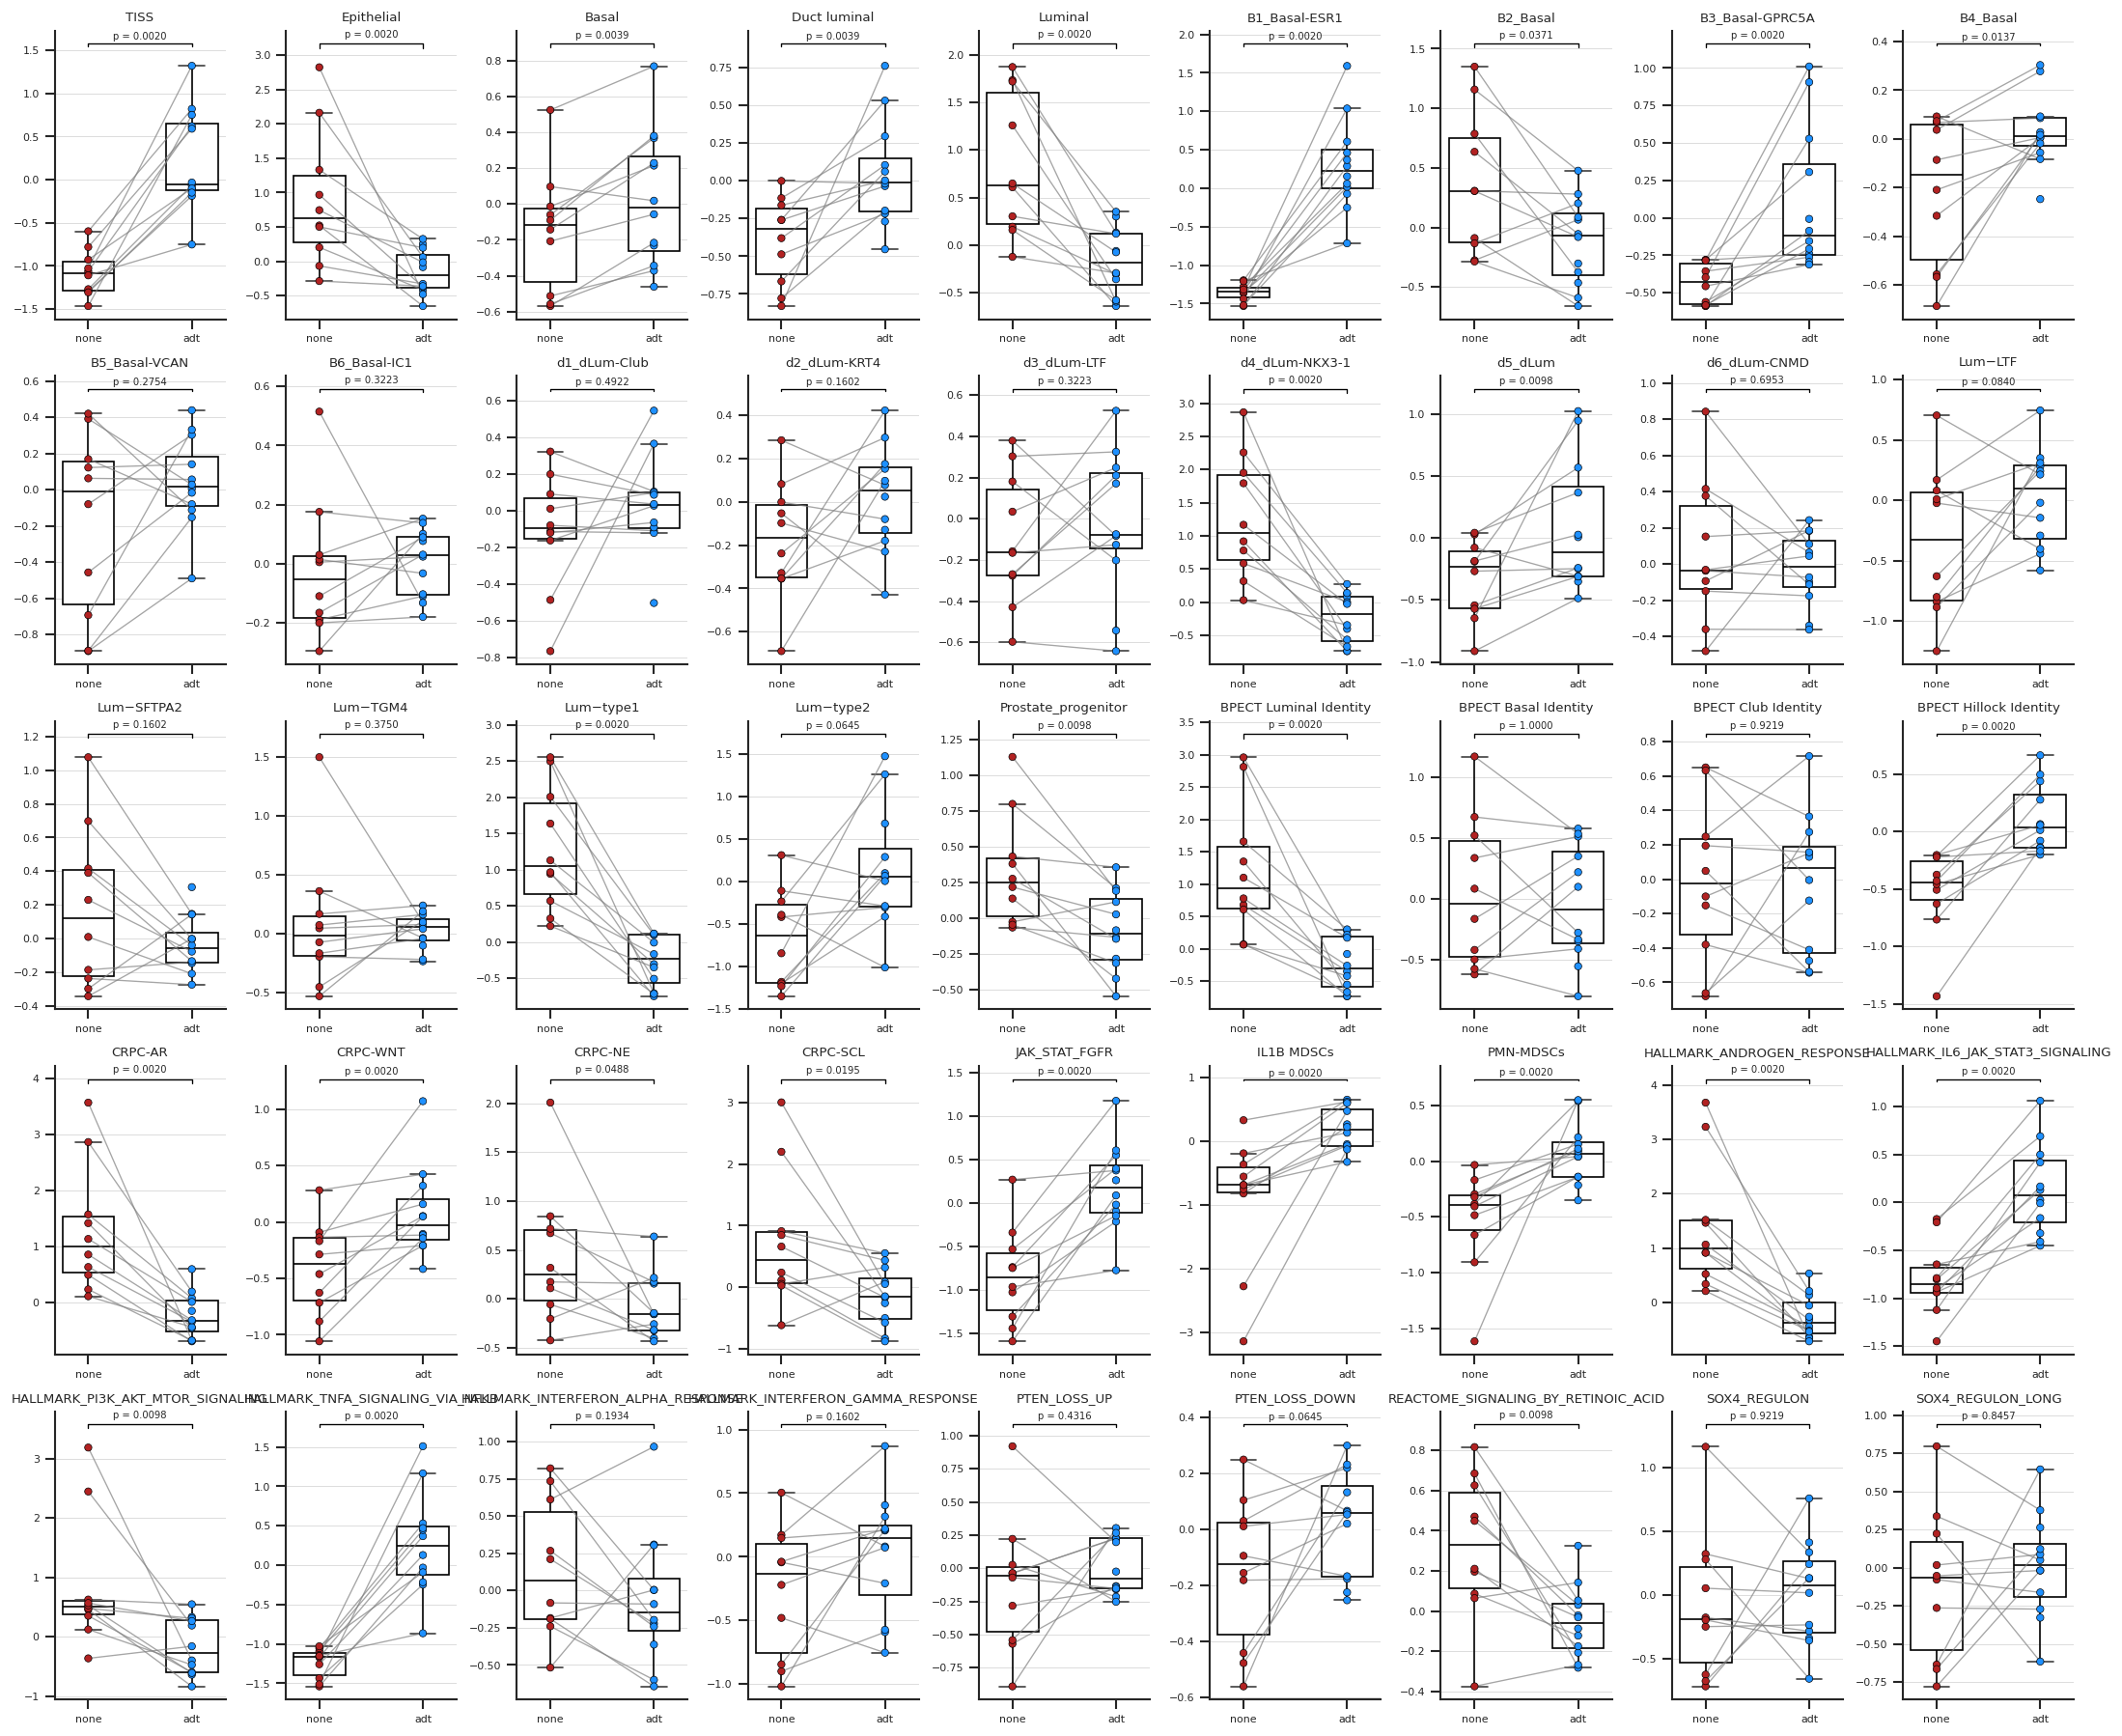

In [21]:
n_rows = 5
n_cols = 9

fig, axes = plt.subplots(
    n_rows,
    n_cols,
    figsize=(n_cols * 2, n_rows * 3),
    dpi=120,
    sharey=False
)

axes = axes.flatten()

for ax, sig in zip(axes, geneset_names):

    # -----------------------------
    # Patient-level mean per treatment
    # -----------------------------
    df_mean = (
        df
        .groupby(["patient", "treatment_simple"], as_index=False)[sig]
        .mean()
    )

    # -----------------------------
    # Paired Wilcoxon signed-rank
    # -----------------------------
    df_wide = (
        df_mean
        .pivot(index="patient", columns="treatment_simple", values=sig)
        .dropna()
    )

    treatments = df_wide.columns.tolist()
    stat, pval = wilcoxon(
        df_wide[treatments[0]],
        df_wide[treatments[1]]
    )

    # -----------------------------
    # Boxplot
    # -----------------------------
    sns.boxplot(
        data=df_mean,
        x="treatment_simple",
        y=sig,
        ax=ax,
        width=0.5,
        showcaps=True,
        boxprops=dict(facecolor="white", edgecolor="black"),
        whiskerprops=dict(color="black"),
        medianprops=dict(color="black"),
        flierprops=dict(marker=""),
        zorder=1,
    )

    # Points
    sns.scatterplot(
        data=df_mean,
        x="treatment_simple",
        y=sig,
        hue="treatment_simple",
        s=20,
        ax=ax,
        linewidth=0.4,
        edgecolor="black",
        zorder=3,
        legend=False,
    )

    # Paired lines
    for patient, d in df_mean.groupby("patient"):
        if d["treatment_simple"].nunique() > 1:
            ax.plot(
                d["treatment_simple"],
                d[sig],
                color="gray",
                alpha=0.7,
                linewidth=0.8,
                zorder=2,
            )

    # -----------------------------
    # Wilcoxon annotation
    # -----------------------------
    y_min, y_max = df_mean[sig].min(), df_mean[sig].max()
    y = y_max + 0.08 * (y_max - y_min)

    ax.plot(
        [0, 0, 1, 1],
        [y, y * 1.02, y * 1.02, y],
        lw=0.8,
        color="black",
    )

    ax.text(
        0.5,
        y * 1.04,
        f"p = {pval:.4f}",
        ha="center",
        va="bottom",
        fontsize=6,
    )

    # -----------------------------
    # Aesthetics
    # -----------------------------
    ax.set_title(sig, fontsize=8)
    ax.set_xlabel("")
    ax.set_ylabel("")
    ax.spines[["top", "right"]].set_visible(False)
    ax.set_axisbelow(True)
    ax.grid(axis="y", linewidth=0.4)

# Hide unused axes (if any)
for ax in axes[len(geneset_names):]:
    ax.axis("off")

plt.tight_layout()
plt.savefig('/home/ak431480/plots/neoadj_signature_score_boxplots_pairwise.pdf')
plt.show()


/tmp/ipykernel_185703/3715856528.py:23: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(["patient", "treatment_simple"], as_index=False)[sig]
/tmp/ipykernel_185703/3715856528.py:23: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(["patient", "treatment_simple"], as_index=False)[sig]


/tmp/ipykernel_185703/3715856528.py:23: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(["patient", "treatment_simple"], as_index=False)[sig]
/tmp/ipykernel_185703/3715856528.py:23: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(["patient", "treatment_simple"], as_index=False)[sig]
/tmp/ipykernel_185703/3715856528.py:23: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(["patient", "treatment_simple"]

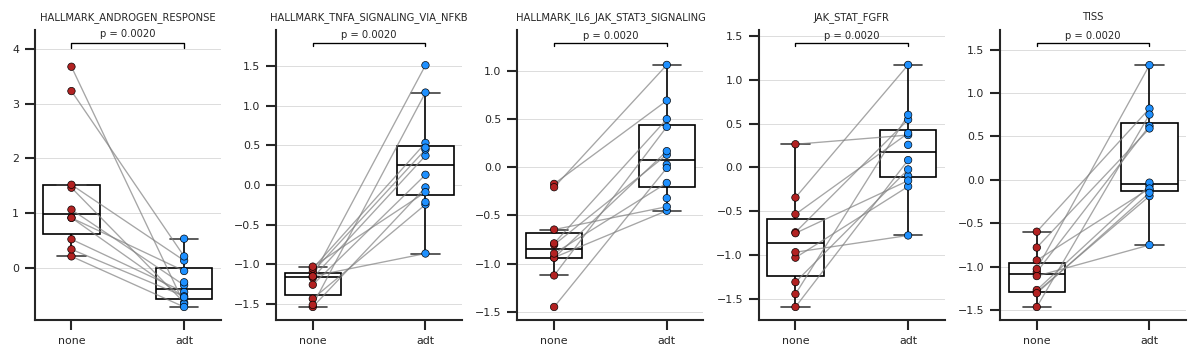

In [22]:
n_rows = 1
n_cols = 5

fig, axes = plt.subplots(
    n_rows,
    n_cols,
    figsize=(n_cols * 2, n_rows * 3),
    dpi=120,
    sharey=False
)

axes = axes.flatten()
genesets_important = ['HALLMARK_ANDROGEN_RESPONSE','HALLMARK_TNFA_SIGNALING_VIA_NFKB','HALLMARK_IL6_JAK_STAT3_SIGNALING','JAK_STAT_FGFR','TISS']


for ax, sig in zip(axes, genesets_important):

    # -----------------------------
    # Patient-level mean per treatment
    # -----------------------------
    df_mean = (
        df
        .groupby(["patient", "treatment_simple"], as_index=False)[sig]
        .mean()
    )

    # -----------------------------
    # Paired Wilcoxon signed-rank
    # -----------------------------
    df_wide = (
        df_mean
        .pivot(index="patient", columns="treatment_simple", values=sig)
        .dropna()
    )

    treatments = df_wide.columns.tolist()
    stat, pval = wilcoxon(
        df_wide[treatments[0]],
        df_wide[treatments[1]]
    )

    # -----------------------------
    # Boxplot
    # -----------------------------
    sns.boxplot(
        data=df_mean,
        x="treatment_simple",
        y=sig,
        ax=ax,
        width=0.5,
        showcaps=True,
        boxprops=dict(facecolor="white", edgecolor="black"),
        whiskerprops=dict(color="black"),
        medianprops=dict(color="black"),
        flierprops=dict(marker=""),
        zorder=1,
    )

    # Points
    sns.scatterplot(
        data=df_mean,
        x="treatment_simple",
        y=sig,
        hue="treatment_simple",
        s=20,
        ax=ax,
        linewidth=0.4,
        edgecolor="black",
        zorder=3,
        legend=False,
    )

    # Paired lines
    for patient, d in df_mean.groupby("patient"):
        if d["treatment_simple"].nunique() > 1:
            ax.plot(
                d["treatment_simple"],
                d[sig],
                color="gray",
                alpha=0.7,
                linewidth=0.8,
                zorder=2,
            )

    # -----------------------------
    # Wilcoxon annotation
    # -----------------------------
    y_min, y_max = df_mean[sig].min(), df_mean[sig].max()
    y = y_max + 0.08 * (y_max - y_min)

    ax.plot(
        [0, 0, 1, 1],
        [y, y * 1.02, y * 1.02, y],
        lw=0.8,
        color="black",
    )

    ax.text(
        0.5,
        y * 1.04,
        f"p = {pval:.4f}",
        ha="center",
        va="bottom",
        fontsize=6,
    )

    # -----------------------------
    # Aesthetics
    # -----------------------------
    ax.set_title(sig, fontsize=6)
    ax.set_xlabel("")
    ax.set_ylabel("")
    ax.spines[["top", "right"]].set_visible(False)
    ax.set_axisbelow(True)
    ax.grid(axis="y", linewidth=0.4)

# Hide unused axes (if any)
for ax in axes[len(geneset_names):]:
    ax.axis("off")

plt.tight_layout()
plt.savefig('/home/ak431480/plots/neoadj_signature_score_boxplots_pairwise_important.pdf')
plt.show()


## Spatial plots

In [28]:
genesets_important = ['HALLMARK_ANDROGEN_RESPONSE','HALLMARK_TNFA_SIGNALING_VIA_NFKB','HALLMARK_IL6_JAK_STAT3_SIGNALING','JAK_STAT_FGFR','TISS','Epithelial']


for sig in genesets_important:
    patients = sample_sheet['PATIENT'].unique()

    # Keep only patients with both pre and post
    valid_patients = []
    patient_samples = {}

    for p in patients:
        p_samplesheet = sample_sheet[sample_sheet['PATIENT'] == p]
        if len(p_samplesheet) > 1:
            try:
                samples = (
                    p_samplesheet
                    .set_index('SAMPLE')
                    .loc[[f'{p}_pre', f'{p}_post']]['SAMPLE_PAD']
                    .tolist()
                )
                valid_patients.append(p)
                patient_samples[p] = samples
            except KeyError:
                continue

    n_patients = len(valid_patients)

    # ---- layout: 2 rows × 5 columns (10 patients)
    n_cols = 5
    n_rows = math.ceil(n_patients / n_cols)

    fig = plt.figure(figsize=(n_cols * 6, n_rows * 5), dpi=300)
    outer = fig.add_gridspec(n_rows, n_cols, wspace=0.25, hspace=0.35)

    for i, p in enumerate(valid_patients):
        r, c = divmod(i, n_cols)

        # inner 2×2 grid for this patient
        inner = outer[r, c].subgridspec(2, 2, wspace=0.05, hspace=0.05)

        axs = [
            fig.add_subplot(inner[0, 0]),
            fig.add_subplot(inner[0, 1]),
            fig.add_subplot(inner[1, 0]),
            fig.add_subplot(inner[1, 1]),
        ]

        pre_sample, post_sample = patient_samples[p]

        # ---- PRE
        slide = adata_dict[pre_sample]
        slide.obs = obs_data.loc[slide.obs_names].copy() # Copy in the z-scored values

        sc.pl.spatial(
            slide,
            color=sig,
            size=1.3,
            frameon=False,
            alpha_img=1,
            alpha=0,
            colorbar_loc=None,
            ax=axs[0],
            show=False,
        )
        axs[0].set_title("")

        sc.pl.spatial(
            slide,
            color=sig,
            size=1.3,
            frameon=False,
            alpha_img=0.2,
            ax=axs[1],
            show=False,
        )
        axs[1].set_title("")

        # ---- POST
        slide = adata_dict[post_sample]
        slide.obs = obs_data.loc[slide.obs_names].copy() # Copy in the z-scored values
        sc.pl.spatial(
            slide,
            color=sig,
            size=1.3,
            frameon=False,
            alpha_img=1,
            alpha=0,
            colorbar_loc=None,
            ax=axs[2],
            show=False,
        )
        axs[2].set_title("")

        sc.pl.spatial(
            slide,
            color=sig,
            size=1.3,
            frameon=False,
            alpha_img=0.2,
            ax=axs[3],
            show=False,
        )
        axs[3].set_title("")

        # Patient label (top-left panel)
        axs[0].set_title(f'{p} - {sig}', fontsize=9, loc="left")

    # Hide empty panels if <10 patients
    for j in range(i + 1, n_rows * n_cols):
        r, c = divmod(j, n_cols)
        fig.add_subplot(outer[r, c]).axis("off")

    # ---- save once
    plt.savefig(
        f"/home/ak431480/plots/signature_scores_on_neoadj_spatial/{sig}_all_patients.pdf",
        bbox_inches="tight"
    )
    plt.clf()



/tmp/ipykernel_185703/3696948935.py:54: FutureWarning: Use `squidpy.pl.spatial_scatter` instead.
  sc.pl.spatial(
/tmp/ipykernel_185703/3696948935.py:67: FutureWarning: Use `squidpy.pl.spatial_scatter` instead.
  sc.pl.spatial(
/tmp/ipykernel_185703/3696948935.py:81: FutureWarning: Use `squidpy.pl.spatial_scatter` instead.
  sc.pl.spatial(
/tmp/ipykernel_185703/3696948935.py:94: FutureWarning: Use `squidpy.pl.spatial_scatter` instead.
  sc.pl.spatial(
/tmp/ipykernel_185703/3696948935.py:54: FutureWarning: Use `squidpy.pl.spatial_scatter` instead.
  sc.pl.spatial(
/tmp/ipykernel_185703/3696948935.py:67: FutureWarning: Use `squidpy.pl.spatial_scatter` instead.
  sc.pl.spatial(
/tmp/ipykernel_185703/3696948935.py:81: FutureWarning: Use `squidpy.pl.spatial_scatter` instead.
  sc.pl.spatial(
/tmp/ipykernel_185703/3696948935.py:94: FutureWarning: Use `squidpy.pl.spatial_scatter` instead.
  sc.pl.spatial(
/tmp/ipykernel_185703/3696948935.py:54: FutureWarning: Use `squidpy.pl.spatial_scatter` 

<Figure size 9000x3000 with 0 Axes>

<Figure size 9000x3000 with 0 Axes>

<Figure size 9000x3000 with 0 Axes>

<Figure size 9000x3000 with 0 Axes>

<Figure size 9000x3000 with 0 Axes>

<Figure size 9000x3000 with 0 Axes>

### Check ERG expression

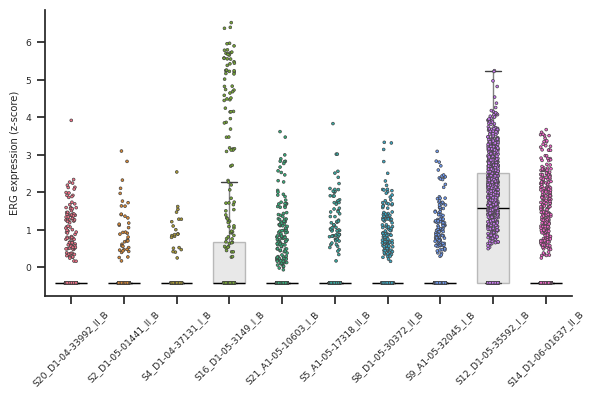

In [54]:
biopsy_samples = sample_sheet[sample_sheet['SAMPLE'].str.contains('pre')]['SAMPLE_PAD'].tolist()
prostatectomy_samples = sample_sheet[sample_sheet['SAMPLE'].str.contains('post')]['SAMPLE_PAD'].tolist()

gene_name = 'ERG'
dfs = []

for s in biopsy_samples:
#for s in prostatectomy_samples:
    adata = adata_dict[s]

    # extract ERG expression
    erg_expr = adata[:, gene_name].X

    # handle sparse matrices
    if hasattr(erg_expr, "toarray"):
        erg_expr = erg_expr.toarray().flatten()
    else:
        erg_expr = erg_expr.flatten()

    df = pd.DataFrame({
        gene_name: erg_expr,
        "sample": s
    })

    dfs.append(df)

# combine all samples
erg_df = pd.concat(dfs, ignore_index=True)

# z-score ERG across all cells (not per sample)
erg_df[f"{gene_name}_z"] = zscore(erg_df[gene_name], nan_policy="omit")

# plot
fig, ax = plt.subplots(figsize=(6, 4))

# Boxplot FIRST (background)
sns.boxplot(
    data=erg_df,
    x="sample",
    y=f"{gene_name}_z",
    dodge=True,
    width=0.6,
    showcaps=True,
    boxprops=dict(facecolor='lightgray', edgecolor='gray', alpha=0.5),
    whiskerprops=dict(color='gray'),
    medianprops=dict(color='black'),
    flierprops=dict(marker=''),
    ax=ax
)

# Stripplot on top
sns.stripplot(
    data=erg_df,
    x="sample",
    y=f"{gene_name}_z",
    hue='sample',
    size=2,
    linewidth=0.5,
    ax=ax
)


plt.ylabel(f"{gene_name} expression (z-score)")
ax.spines[['top','right']].set_visible(False)
plt.xlabel("")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


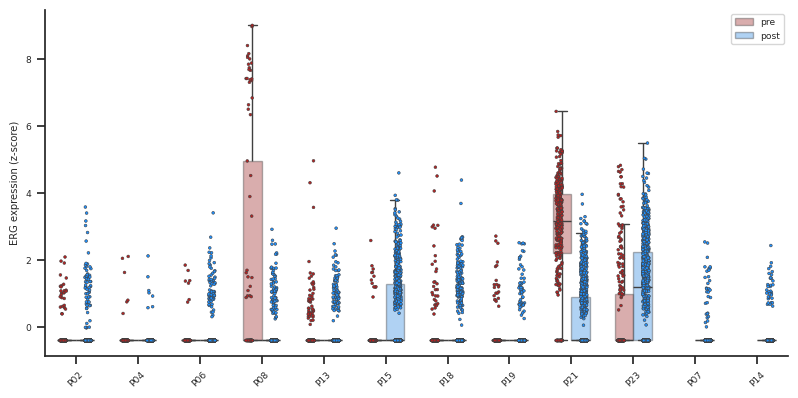

In [56]:
gene_name = "ERG"
epi_key = "Epithelial"
quantile = 0.75   # top quartile; change to 0.9 if you want stricter

dfs = []

for s in biopsy_samples + prostatectomy_samples:
    adata = adata_dict[s]

    # sanity check
    if epi_key not in adata.obs or gene_name not in adata.var_names:
        continue

    # metadata lookup
    row = sample_sheet.loc[sample_sheet["SAMPLE_PAD"] == s].iloc[0]
    patient = row["PATIENT"]
    timepoint = "pre" if "pre" in row["SAMPLE"] else "post"

    # epithelial score & top-quantile mask (PER SAMPLE)
    epi_scores = adata.obs[epi_key].values
    thr = np.nanquantile(epi_scores, quantile)
    epi_mask = epi_scores >= thr

    if epi_mask.sum() == 0:
        continue

    # extract ERG expression
    erg_expr = adata[:, gene_name].X
    if hasattr(erg_expr, "toarray"):
        erg_expr = erg_expr.toarray().flatten()
    else:
        erg_expr = erg_expr.flatten()

    dfs.append(pd.DataFrame({
        gene_name: erg_expr[epi_mask],
        "PATIENT": patient,
        "timepoint": timepoint
    }))

if len(dfs) == 0:
    raise ValueError("No spots passed epithelial quantile filtering.")

erg_df = pd.concat(dfs, ignore_index=True)

# z-score across all retained spots
erg_df[f"{gene_name}_z"] = zscore(erg_df[gene_name], nan_policy="omit")

fig, ax = plt.subplots(figsize=(8, 4))

sns.boxplot(
    data=erg_df,
    x="PATIENT",
    y=f"{gene_name}_z",
    hue="timepoint",
    width=0.6,
    showcaps=True,
    boxprops=dict(alpha=0.4),
    flierprops=dict(marker=""),
    ax=ax
)

sns.stripplot(
    data=erg_df,
    x="PATIENT",
    y=f"{gene_name}_z",
    hue="timepoint",
    dodge=True,
    size=2,
    linewidth=0.4,
    ax=ax
)

# clean legend (avoid duplicates)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[:2], labels[:2], title="")

plt.ylabel(f"{gene_name} expression (z-score)")
plt.xlabel("")
ax.spines[['top', 'right']].set_visible(False)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Signature scores in individual spots split by sample

In [83]:
df = obs_data[obs_data['Epithelial'] > 1].copy()
sig = 'HALLMARK_INTERFERON_ALPHA_RESPONSE'

fig, ax = plt.subplots(figsize=(8, 4), dpi=120)
# Boxplot FIRST (background)
sns.boxplot(
    data=df,
    x='patient',
    y=sig,
    hue='treatment_simple',
    dodge=True,
    ax=ax,
    width=0.8,
    gap=0.5,
    showcaps=True,
    boxprops=dict(facecolor='whitesmoke', edgecolor='gray', alpha=0.5),
    whiskerprops=dict(color='gray'),
    medianprops=dict(color='gray'),
    flierprops=dict(marker=''),
)

# Stripplot on top
sns.stripplot(
    data=df,
    x='patient',
    y=sig,
    hue='treatment_simple',
    dodge=True,
    size=1,
    linewidth=0.2,
    ax=ax,
)

# Clean up
ax.spines[['top', 'right']].set_visible(False)
ax.grid(axis='y')

# Remove duplicate legend
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[:len(set(df['treatment_simple']))],
          labels[:len(set(df['treatment_simple']))],
          title='Treatment')

plt.show()
